# Arsenal Social Sentiment Analysis
## Forecasting User Sentiment between games. 
by *Ben N. Bellman* 
<br> Prepared as Springboard Capstone Project
<br> *4/13/2022*

<img src="../images/who-s-denilo-SuBb_SiEEM8-unsplash.jpg" style="width:800px;height:400px"/>

### WARNING: 
*Although the usernames have been anonymized as to protect the privacy of the users in this analysis, the tweets are still in raw format and may contain inappropriate / sensitive content. Viewer discretion is advised*

## Outline

## Data Mapping: 

One of the important things to know for the analysis is the schedule of the games.
The objective in the social sentiment analysis is to predict whether or not a specific tweet is likely to come  

In [1]:
%load_ext watermark
%watermark 

Last updated: 2022-05-12T08:37:52.003180-07:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.0.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
## We start by importing the packages we will use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, f1_score, fbeta_score 
from sklearn.metrics import plot_confusion_matrix,classification_report, balanced_accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, log_loss,matthews_corrcoef, ConfusionMatrixDisplay

from io import StringIO 
from IPython.display import Image,HTML 
import pydotplus
import graphviz
import shap

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',-1)
%matplotlib inline

In [3]:
## Import Functions from pandas module.
import sys
sys.path.insert(1, './../../Analysis_Functions_For_Pandas')
from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes)   

In [4]:
## Load the Data
df = pd.read_csv('.\..\Data\Finalized_DataFrame_All_Data_2_Anonymized.csv')

## I. Data Exploration and Data Wrangling

In [5]:
## Start by previewing the data:
preview_data(df)

First Five Rows of Data: 



,Query2,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount,Result,Team
0,Arsenal until:2022-04-24,2022-04-23 23:59:47+00:00,Anonymous19203,@JackAFC01 @LUHG450 @1Thegameis Because you're arsenal and you have no self awareness..in our worst season in years and your best season in years and you only 6 points ahead of us and you think the gap is that big lol 🤣be real now,1,1,0,1,Arsenal
1,Arsenal until:2022-04-24,2022-04-23 23:59:41+00:00,Anonymous123302,@arsenal_lady bei ihm werde ich einfach immer schwach,1,0,0,1,Arsenal
2,Arsenal until:2022-04-24,2022-04-23 23:59:39+00:00,Anonymous134105,"5 games to go\n\n5 cup finals \n\n5 games to UCL or UEL, either way I want my European trips back.\n\nWe can do it @Arsenal",0,0,0,1,Arsenal
3,Arsenal until:2022-04-24,2022-04-23 23:59:37+00:00,Anonymous112922,"@Arsenal @HectorBellerin VAMOS @HectorBellerin ! Even if you stay in Spain, you'll always be loved in North London ;-)",18,0,0,1,Arsenal
4,Arsenal until:2022-04-24,2022-04-23 23:59:32+00:00,Anonymous65885,@Cristiano Come to @Arsenal 🐐.. so many assists and crosses with no one to finish/ tap in.,0,0,0,1,Arsenal



 Shape: 

(370000, 9)

 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370000 entries, 0 to 369999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Query2        370000 non-null  object
 1   Date          370000 non-null  object
 2   Username      370000 non-null  object
 3   Tweet         370000 non-null  object
 4   TweetLikes    370000 non-null  int64 
 5   TweetReplies  370000 non-null  int64 
 6   RetweetCount  370000 non-null  int64 
 7   Result        370000 non-null  int64 
 8   Team          370000 non-null  object
dtypes: int64(4), object(5)
memory usage: 25.4+ MB
None


In [6]:
## Get the missing values
get_missing_counts(df)

Missing Value Percentages by Column: 

Query2 -----> 0 -----> 0.0%
Date -----> 0 -----> 0.0%
Username -----> 0 -----> 0.0%
Tweet -----> 0 -----> 0.0%
TweetLikes -----> 0 -----> 0.0%
TweetReplies -----> 0 -----> 0.0%
RetweetCount -----> 0 -----> 0.0%
Result -----> 0 -----> 0.0%
Team -----> 0 -----> 0.0%


In [7]:
## Converts date to datetime. 

# Fix this --> get_datetimes(df,'Date',['Date'])
df['Date'] = df['Date'].apply(pd.to_datetime)
print('Date Ranges: {} -- {}'.format(df['Date'].min(), df['Date'].max()))

Date Ranges: 2017-08-11 23:33:41+00:00 -- 2022-04-23 23:59:47+00:00


Ok, so the date ranges are between 03-29-22 and 4-13-22, so the 500,000 tweets about Arsenal are all in a two week period. 
<br> In that two week period, Arsenal were coming out of the international break and played two games which they both lost: 
- **Crystal Palace** -- *04-04-22*  
- **Brighton & Holvion** -- *04-09-22* 

In [8]:
## Get unique values in each column: 
get_unique_column_count(df)

Unique values in each object column: 

Query2: 370
Username: 200163
Tweet: 364939
Team: 2


Looking at this, we have a little more than twice as many tweets as users. 

In [9]:
## Get Values
get_value_counts(df)

Unique values in each object column: 

Query2
Arsenal until:2022-04-24      1000
Arsenal until:2019-02-10      1000
Arsenal until:2019-01-02      1000
Arsenal until:2019-01-13      1000
Tottenham until:2019-01-14    1000
                              ... 
Tottenham until:2020-12-07    1000
Arsenal until:2020-12-07      1000
Tottenham until:2020-12-14    1000
Arsenal until:2020-12-14      1000
Arsenal until:2017-08-12      1000
Name: Query2, Length: 370, dtype: int64{}


Username
Anonymous172324    733
Anonymous19929     505
Anonymous193374    495
Anonymous185859    482
Anonymous172325    444
                  ... 
Anonymous125581    1  
Anonymous172528    1  
Anonymous104154    1  
Anonymous89844     1  
Anonymous51654     1  
Name: Username, Length: 200163, dtype: int64{}


Tweet
Klub Lokal Indonesia, Niac Mitra Mengalahkan   Arsenal 2-0 pada 16 Juni 1983 di Surabaya.                                                                                                                       

In [10]:
## We can look at the distribution of our tweets.
df.describe()

,TweetLikes,TweetReplies,RetweetCount,Result
count,370000.000000,370000.000000,370000.000000,370000.000000
mean,13.227970,0.613457,1.463178,0.510811
std,346.070628,8.751398,44.362228,0.499884
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000
max,85832.000000,2099.000000,12598.000000,1.000000


## II. Exploratory Data Analysis

#### Tweet Dates:

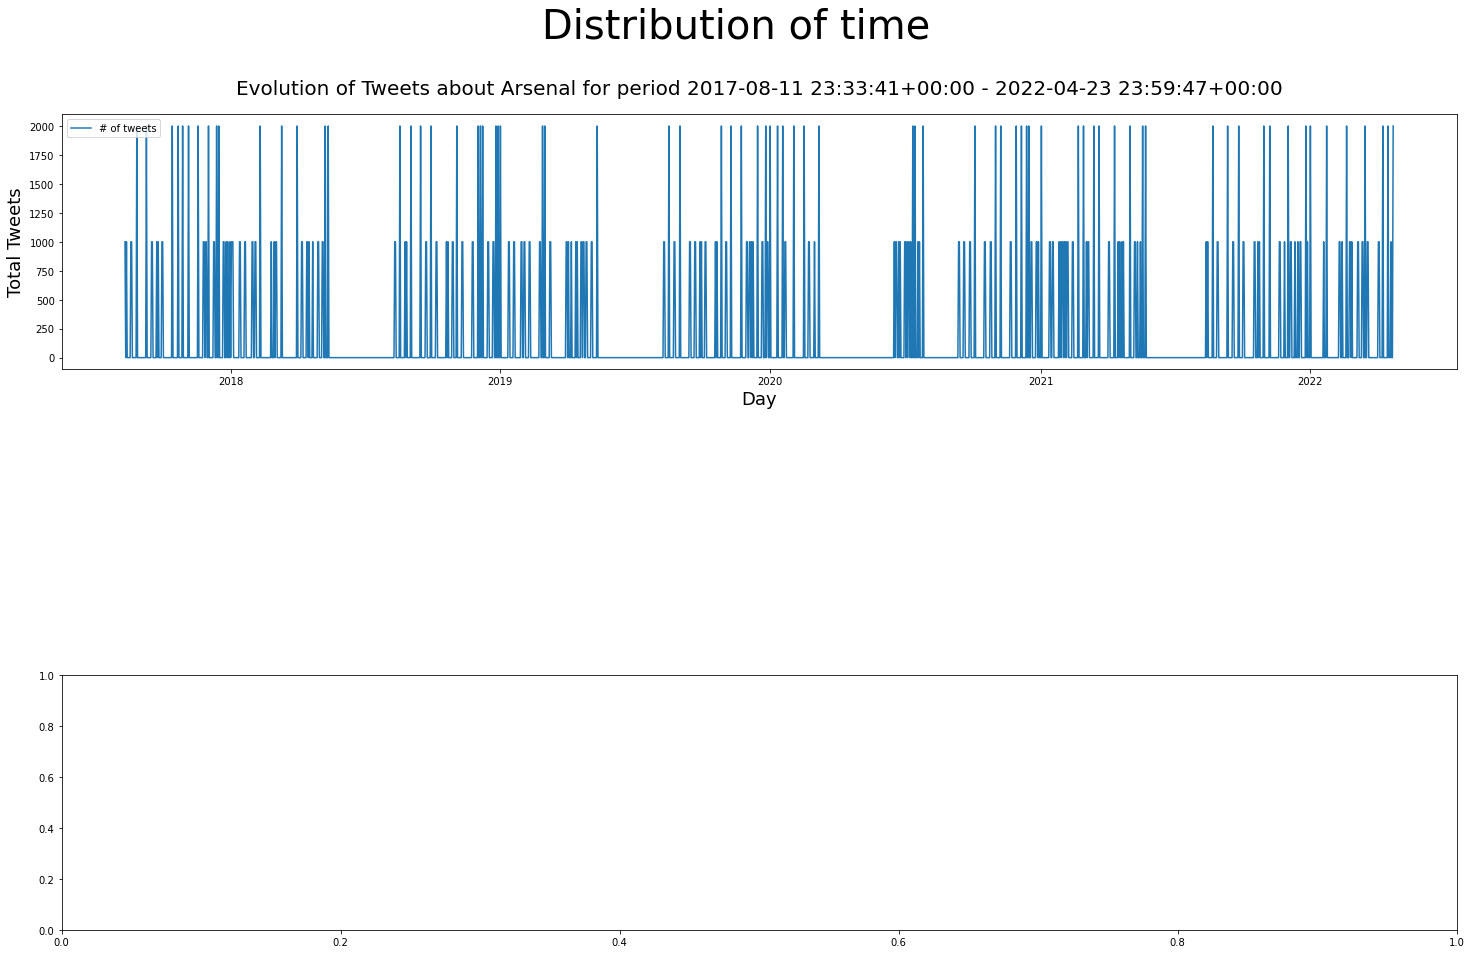

<Figure size 1440x576 with 0 Axes>

In [11]:
## We create a time-series Dataframe and resample by day.
time_df = df[['Date','Username']]
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df['Tweet'] = 1
time_df.drop(columns='Username', inplace=True)
time_df.set_index('Date', inplace = True)
time_df = time_df.resample('d').sum()
time_df

## We plot the number of tweets during the time period.
fig, axes = plt.subplots(2, figsize=(25,15))
fig.suptitle('Distribution of time', fontsize =40)
fig.subplots_adjust(hspace=1.2)
plt.figure(figsize=(20,8))

axes[0].plot(time_df, label = '# of tweets')
axes[0].set_title('Evolution of Tweets about Arsenal for period {} - {}'.format(df['Date'].min(), df['Date'].max()), fontsize = 20, pad =20)
axes[0].set_xlabel('Day', fontsize = 18)
axes[0].set_ylabel('Total Tweets', fontsize = 18)
axes[0].legend(loc='best')
plt.show()

Let's look at a preview of the 10 most liked tweets. 

#### Most Popular Tweets:

In [12]:
## Let's look at the 10 most popular tweets in the dataset.
df[['Tweet','Date','TweetLikes','Username','Team']].sort_values('TweetLikes', ascending =False).head(10)

,Tweet,Date,TweetLikes,Username,Team
176616,Great start of the year. Let’s keep improving together #alltogether #arsenal 2-0 #arsenalvsmanutd https://t.co/PWvqTSyMMm,2020-01-01 23:49:16+00:00,85832,Anonymous115802,Arsenal
176395,That winnin' feeling 🙌🏼😀 #letskeepthisgoing #YaGunnersYa #M1Ö @arsenal https://t.co/spMq7dx0BR,2020-01-01 23:52:56+00:00,65144,Anonymous123930,Arsenal
69878,Pochettino was dismissed from Tottenham and won two trophies in his first season with PSG 🏆 https://t.co/O4cj0xHb7Q,2021-05-19 22:19:57+00:00,40817,Anonymous61382,Tottenham
27871,Incredible. Inconceivable.\n\nWe have no words for this. https://t.co/eQAUaKleRi,2022-01-19 23:30:00+00:00,36590,Anonymous172333,Tottenham
139104,"Great effort from the boys, three points and we keep going! \n#W12 #premierleague #arsenal https://t.co/Ip1jRpsiqG",2020-09-19 23:54:20+00:00,34758,Anonymous194754,Arsenal
244364,Who’s ur ride or die for Super Bowl Sunday Football???\n\n21 Savage: Arsenal \n\nICE: https://t.co/qbvp5ZP8ZW,2019-02-03 23:40:11+00:00,31388,Anonymous134051,Arsenal
107693,"Arsenal using my theme song. The only thing missing, due to COVID, is 30,000 fans chanting “You Suck”. #YouSuckCovid #itstrue https://t.co/VQncpBsoin",2021-01-14 23:28:31+00:00,30610,Anonymous153789,Arsenal
214747,This guy... \n\n🥰🥰🥰 https://t.co/z9e8hfb7oS,2019-08-17 23:05:00+00:00,30353,Anonymous19893,Arsenal
193652,"Unreal, @dele_official! 🔥\n\n#THFC ⚪️ #COYS https://t.co/VWcXKZgpeq",2019-11-23 22:25:00+00:00,29402,Anonymous172333,Tottenham
369,"Copa del Rey: 𝗖𝗵𝗮𝗺𝗽𝗶𝗼𝗻 🏆 \n\nCongratulations, @HectorBellerin ✊\n\n#CopaDelRey | #BetisAlé https://t.co/1QOHlYSxVu",2022-04-23 23:42:30+00:00,29200,Anonymous19893,Arsenal


## Wordcloud

Tweets without removing Tottenham and Arsenal

<img src="../images/worldcloud.jpg" style="width:800px;height:400px"/>

Tweets when removing Arsenal and Tottenham

<img src="../images/WordCloud_No_Club.jpg" style="width:800px;height:400px"/>

In [13]:
## Collect all the tweets in our dataframe and store it into a list.
tweets = []
for i in df['Tweet']:
    tweets.append(i)

## For each tweet, extract each word and put it into all_words. Remove https links and user mentions.
all_words = []
for tweet in tweets:
    for word in tweet.split(' '):
        if word.startswith('https://'):
            word = " "
        if word.startswith('@'):
            word = " "
        if word.startswith('Arse') or word.startswith('arse'):   ##Uncomment to remove all Arsenal mentions.
            word = " "
        if word.startswith('Tott') or word.startswith('totten'): ##Uncomment to remove all Tottenham mentions.  
            word = " "
        if len(word) <= 3:
            word = " " 
        all_words.append(word)

## Get the first one million words and create a wordcloud.  
list_of_words = " "
for i in all_words[0:100000]: 
    list_of_words += (i+ " " )

In [14]:
from nltk.corpus import stopwords
def content_text(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() in stopwords]
    return content

In [15]:
import nltk
allWords = nltk.tokenize.word_tokenize(list_of_words)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
extra = ['.',",","#",",","!","?","ðÿ",":","”","'s"]
stopwords.extend(extra)
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    

In [16]:
allWordExceptStopDist

FreqDist({'’': 1040, 'chelsea': 427, "n't": 300, 'united': 287, 'arsenal': 261, 'fans': 245, ')': 243, 'league': 238, '(': 231, 'like': 208, ...})

In [17]:
df['Tweet_Cleaned'] = df['Tweet'].str.replace("[^a-zA-Z#]"," ")

In [18]:
df["clean_tweet"] = df['Tweet_Cleaned'].apply(lambda x: " ".join([w for w in x.split() if len(w) >3]))

## III. Preprocessing and Modeling

In [19]:
simp = df[['Team','Result','clean_tweet']]

In [20]:
simp.sample(3)

,Team,Result,clean_tweet
143033,Tottenham,0,Arsenal Leicester Tottenham options that Brazilian contemplates sport
334985,Arsenal,1,ArsenalFanTV Teams worked play against arsenal about years Wenger blinded arrogance refuses believe this hence blames refs players time wasting every week
118881,Arsenal,0,Chris Rich Bray Arsenal Wayasay


## IV. Conclusions

In [21]:
tokenized_tweet = simp['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [JackAFC, LUHG, Thegameis, Because, arsenal, have, self, awareness, worst, season, years, your, best, season, years, only, points, ahead, think, that, real]
1    [arsenal, lady, werde, einfach, immer, schwach]                                                                                                             
2    [games, finals, games, either, want, European, trips, back, Arsenal]                                                                                        
3    [Arsenal, HectorBellerin, VAMOS, HectorBellerin, Even, stay, Spain, always, loved, North, London]                                                           
4    [Cristiano, Come, Arsenal, many, assists, crosses, with, finish]                                                                                            
Name: clean_tweet, dtype: object

In [22]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(word) for word in x])

In [23]:
tokenized_tweet.head()

0    [jackafc, luhg, thegamei, becaus, arsen, have, self, awar, worst, season, year, your, best, season, year, onli, point, ahead, think, that, real]
1    [arsen, ladi, werd, einfach, immer, schwach]                                                                                                    
2    [game, final, game, either, want, european, trip, back, arsen]                                                                                  
3    [arsen, hectorbellerin, vamo, hectorbellerin, even, stay, spain, alway, love, north, london]                                                    
4    [cristiano, come, arsen, mani, assist, cross, with, finish]                                                                                     
Name: clean_tweet, dtype: object

In [24]:
## combine wordsinto single sentence:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
simp['clean_tweet'] = tokenized_tweet
simp.head()

,Team,Result,clean_tweet
0,Arsenal,1,jackafc luhg thegamei becaus arsen have self awar worst season year your best season year onli point ahead think that real
1,Arsenal,1,arsen ladi werd einfach immer schwach
2,Arsenal,1,game final game either want european trip back arsen
3,Arsenal,1,arsen hectorbellerin vamo hectorbellerin even stay spain alway love north london
4,Arsenal,1,cristiano come arsen mani assist cross with finish


## Exploratory Data Analysis 